In [11]:
from dolfin import *
import mshr
import matplotlib
import matplotlib.pyplot as plt

In [15]:
n=40
geometry=mshr.Circle(Point(0.0,0.0),1.0)
mesh = mshr.generate_mesh(geometry,n)

Discrete space size: 3287
8.76027747005 0.0


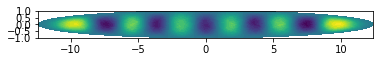

Discrete space size: 3287
7.06209183031 0.0


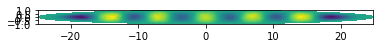

Discrete space size: 3287
6.62639697213 0.0


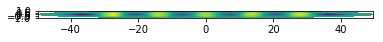

Discrete space size: 3287
6.51690420772 0.0


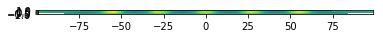

Discrete space size: 3287
6.48942707135 0.0


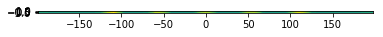

Discrete space size: 3287
6.48233575475 0.0


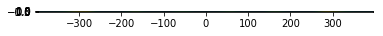

Discrete space size: 3287


RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to extract eigenpair from SLEPc eigenvalue solver.
*** Reason:  Requested eigenpair (10) has not been computed.
*** Where:   This error was encountered inside SLEPcEigenSolver.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2017.1.0
*** Git changeset:  
*** -------------------------------------------------------------------------


In [18]:
for i in range(10):
    V = FunctionSpace(mesh, 'Lagrange', 1)
    bc = DirichletBC(V, 0.0, DomainBoundary())
    u, v = TrialFunction(V), TestFunction(V)

    a = inner(grad(u), grad(v))*dx
    L = Constant(0.0)*v*dx
    m = u*v*dx

    A, _ = assemble_system(a, L, bc)
    B = assemble(m)

    print "Discrete space size: %d"%V.dim()
    eigensolver = SLEPcEigenSolver(as_backend_type(A), as_backend_type(B))
    #prm = eigensolver.parameters
    #info(prm, True)
    eigensolver.parameters['spectrum'] = 'smallest magnitude'

    eigensolver.solve(20)
    eig = Function(V)
    eig_vec = eig.vector()
    
    r, c, rx, cx = eigensolver.get_eigenpair(10)
    eig_vec[:] = rx
    print r, c
    plot(eig)
    plt.show()
    
    mesh.coordinates()[:,0] *= 2.0